In [1]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.3
astropy-iers-data

In [2]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 5.2/376.0 MB 29.0 MB/s eta 0:00:13
   - -------------------------------------- 12.8/376.0 MB 31.0 MB/s eta 0:00:12
   - -------------------------------------- 17.0/376.0 MB 26.8 MB/s eta 0:00:14
   -- ------------------------------------- 23.3/376.0 MB 28.4 MB/s eta 0:00:13
   --- ------------------------------------ 28.8/376.0 MB 26.9 MB/s eta 0:00:13
   --- ------------------------------------ 33.8/376.0 MB 26.5 MB/s eta 0:00:13
   ---- ----------------------------------- 41.2/376.0 MB 27.6 MB/s eta 0:00:13
   ----- ---------------------------------- 49.8/376.0 MB 29.4 MB/s eta 0:00:12
   ------ --------------------------------- 58.7/376.0 MB 31.2 MB/s eta 0:00:11
   ------- -------------------------------- 66.3/376.0 MB 31.3 MB/s eta 0:00:10
   ------- -------------------------------- 70.3/376.0 MB 30.5 MB/s eta 0:00:11
   -------- ------------------------------- 77.1/3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, classification_report

In [6]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [7]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

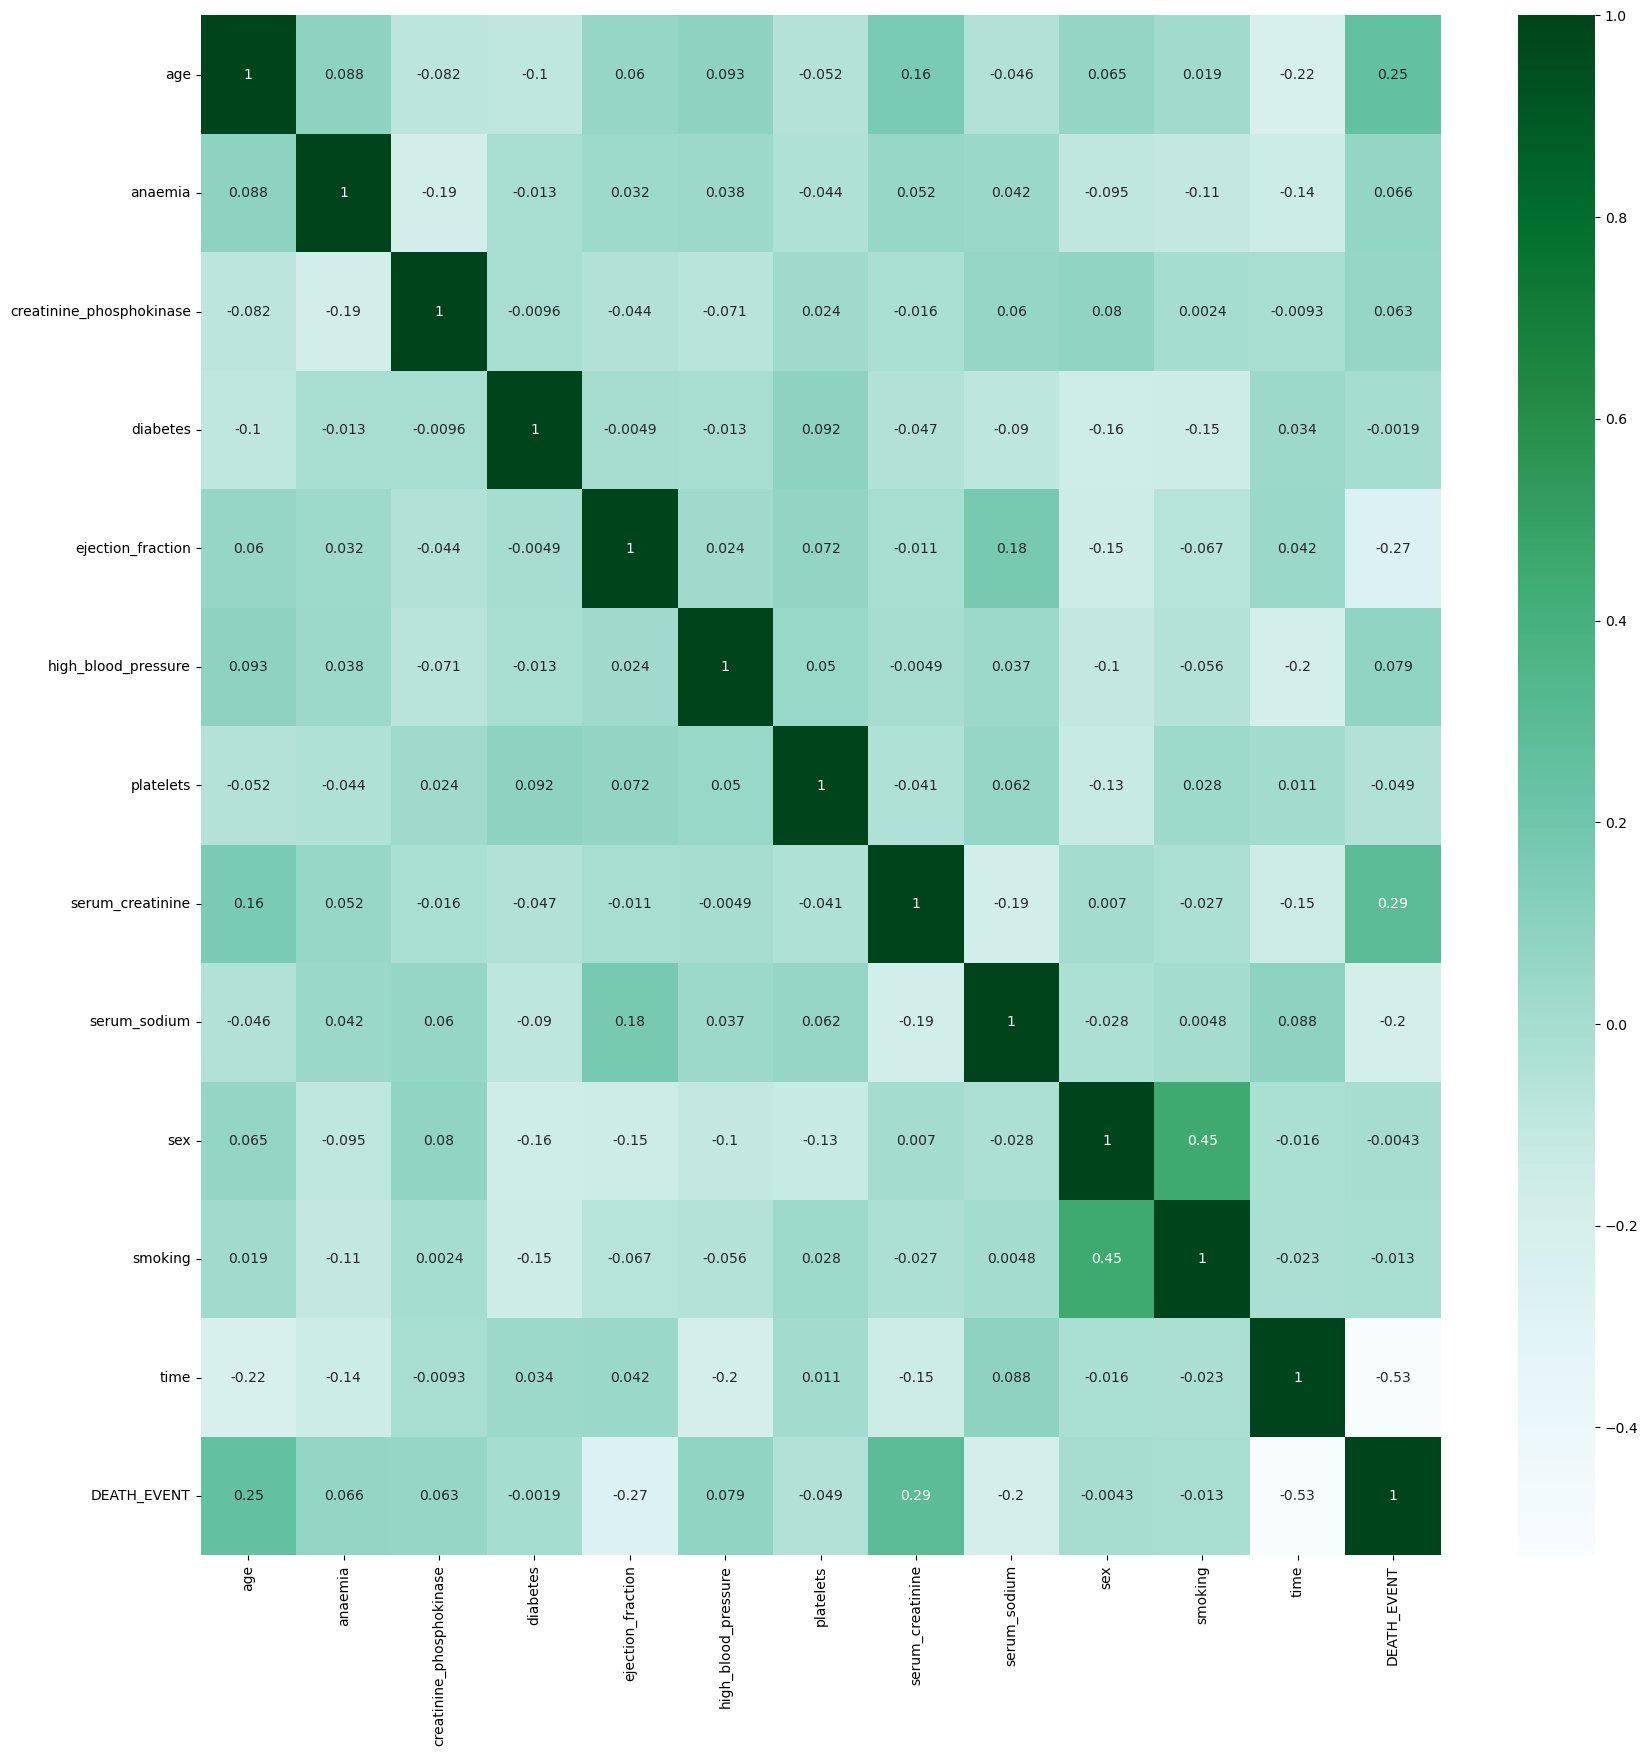

In [10]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap = 'BuGn', annot = True)

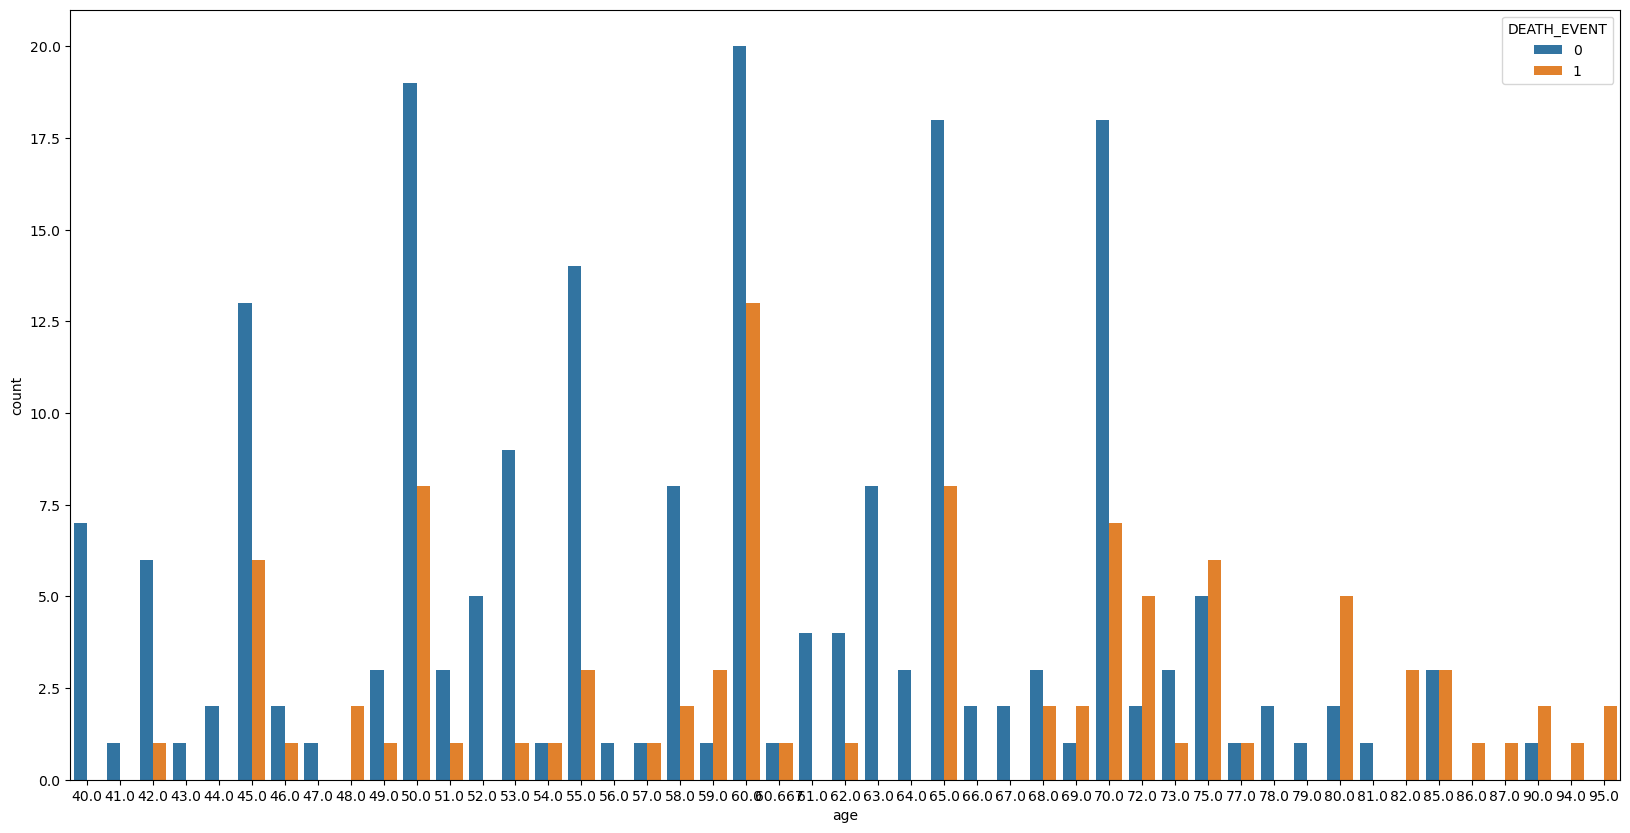

In [11]:
plt.figure(figsize=(20,10))
days_of_weeks = sns.countplot(x = data_df['age'], data = data_df, hue = "DEATH_EVENT")

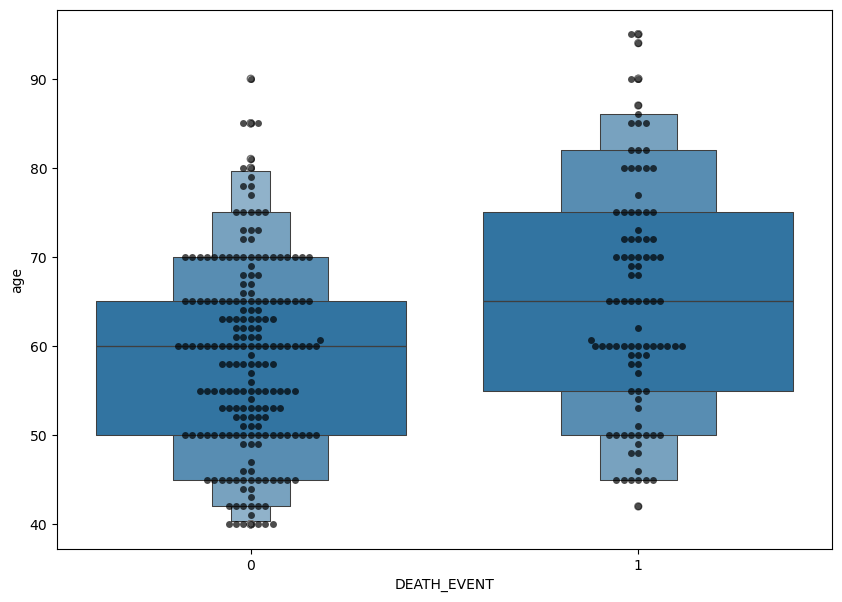

C:\Users\bhuva\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


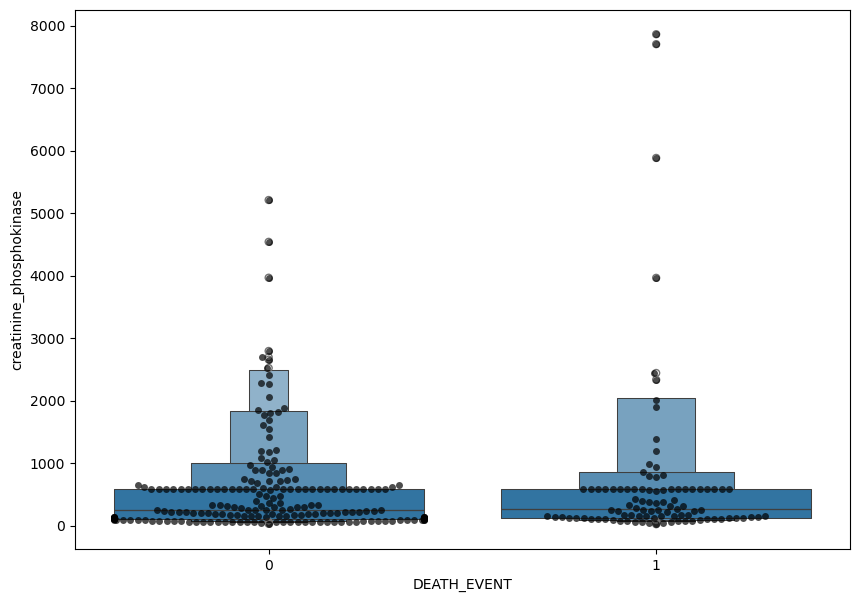

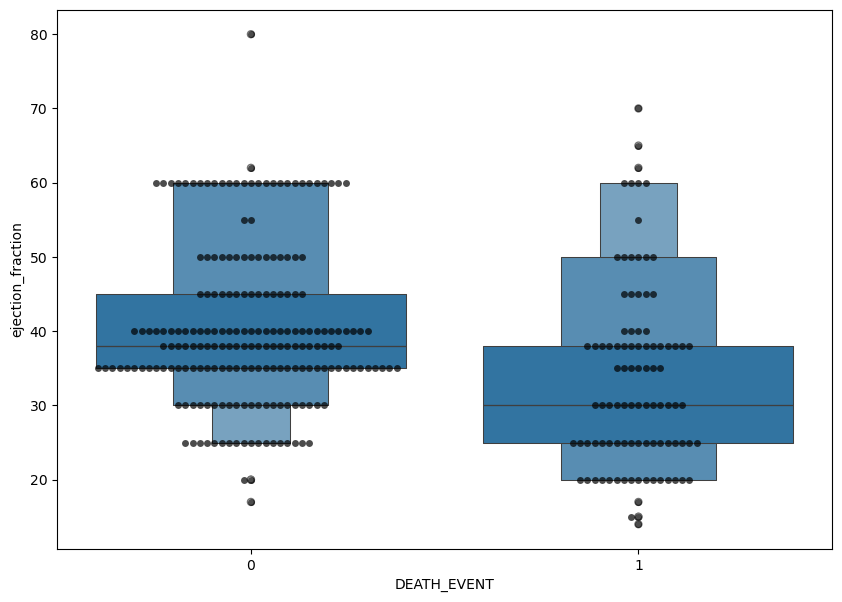

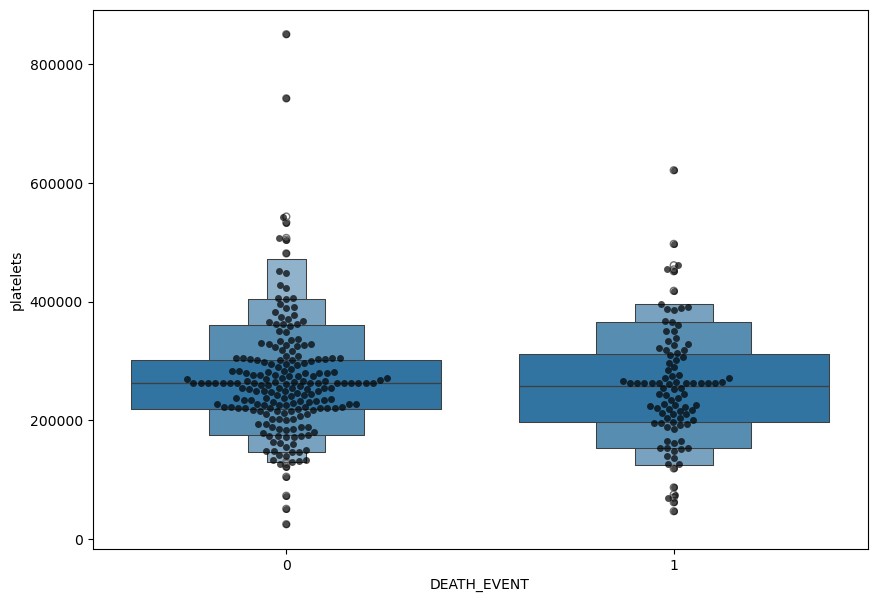

C:\Users\bhuva\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


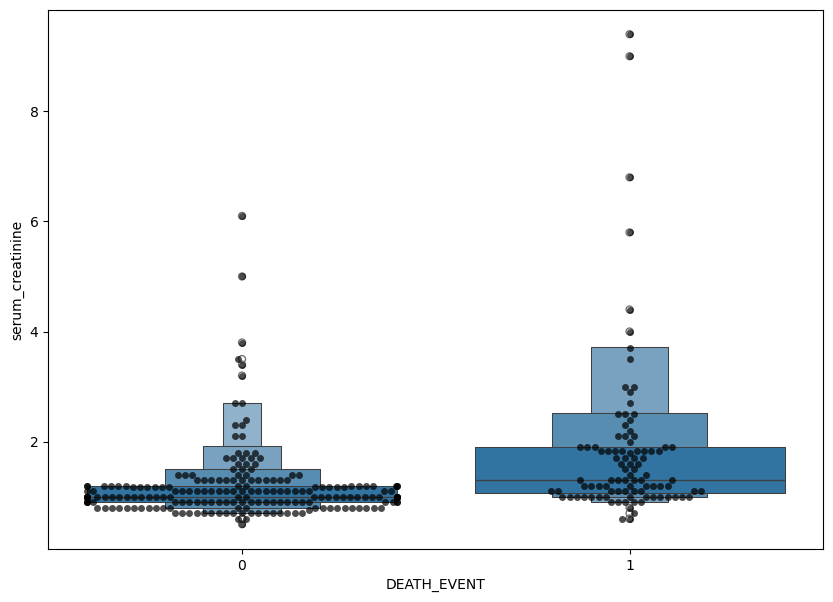

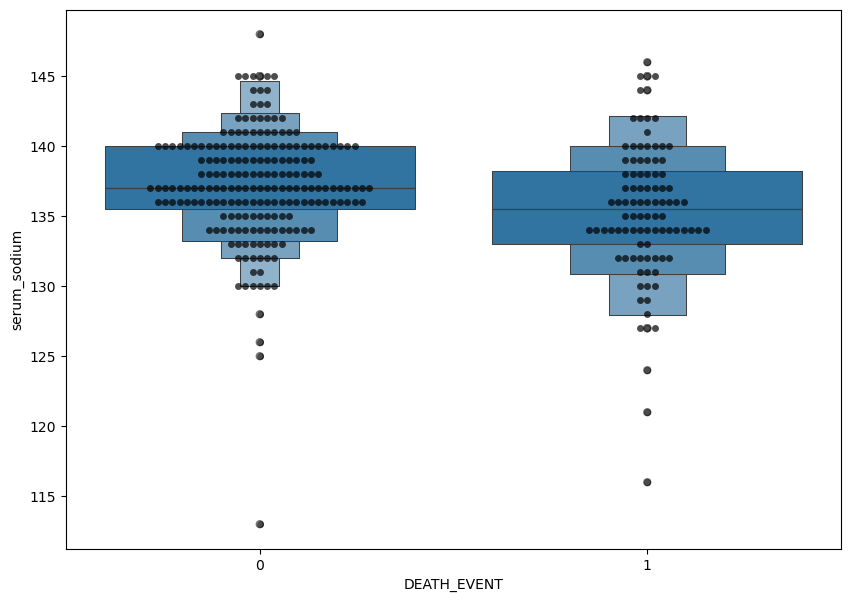

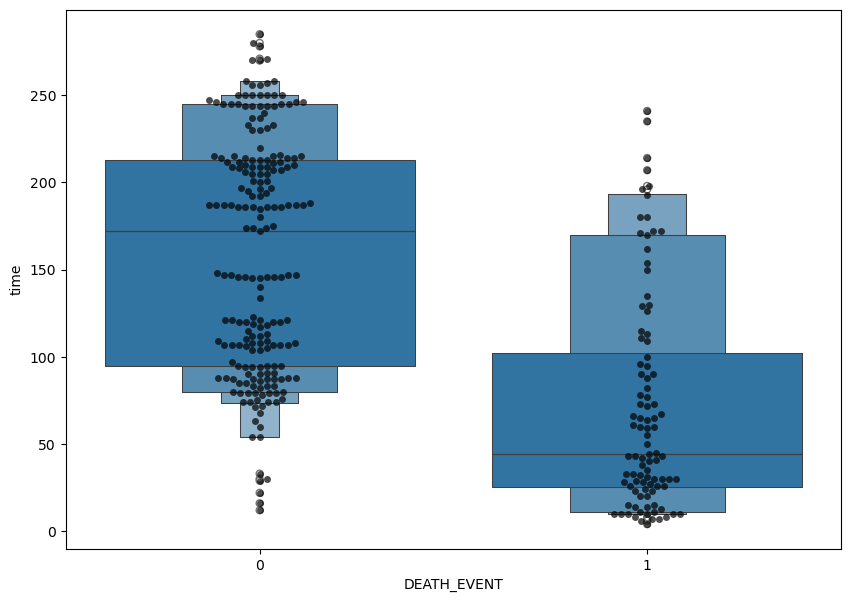

In [12]:
feature = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"] 
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color = "black", alpha = 0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i])
    plt.show()

In [13]:
x=data_df.drop(["DEATH_EVENT"], axis=1)
y=data_df["DEATH_EVENT"]

In [14]:
col_name = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled = s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = col_name)

In [15]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<Axes: >

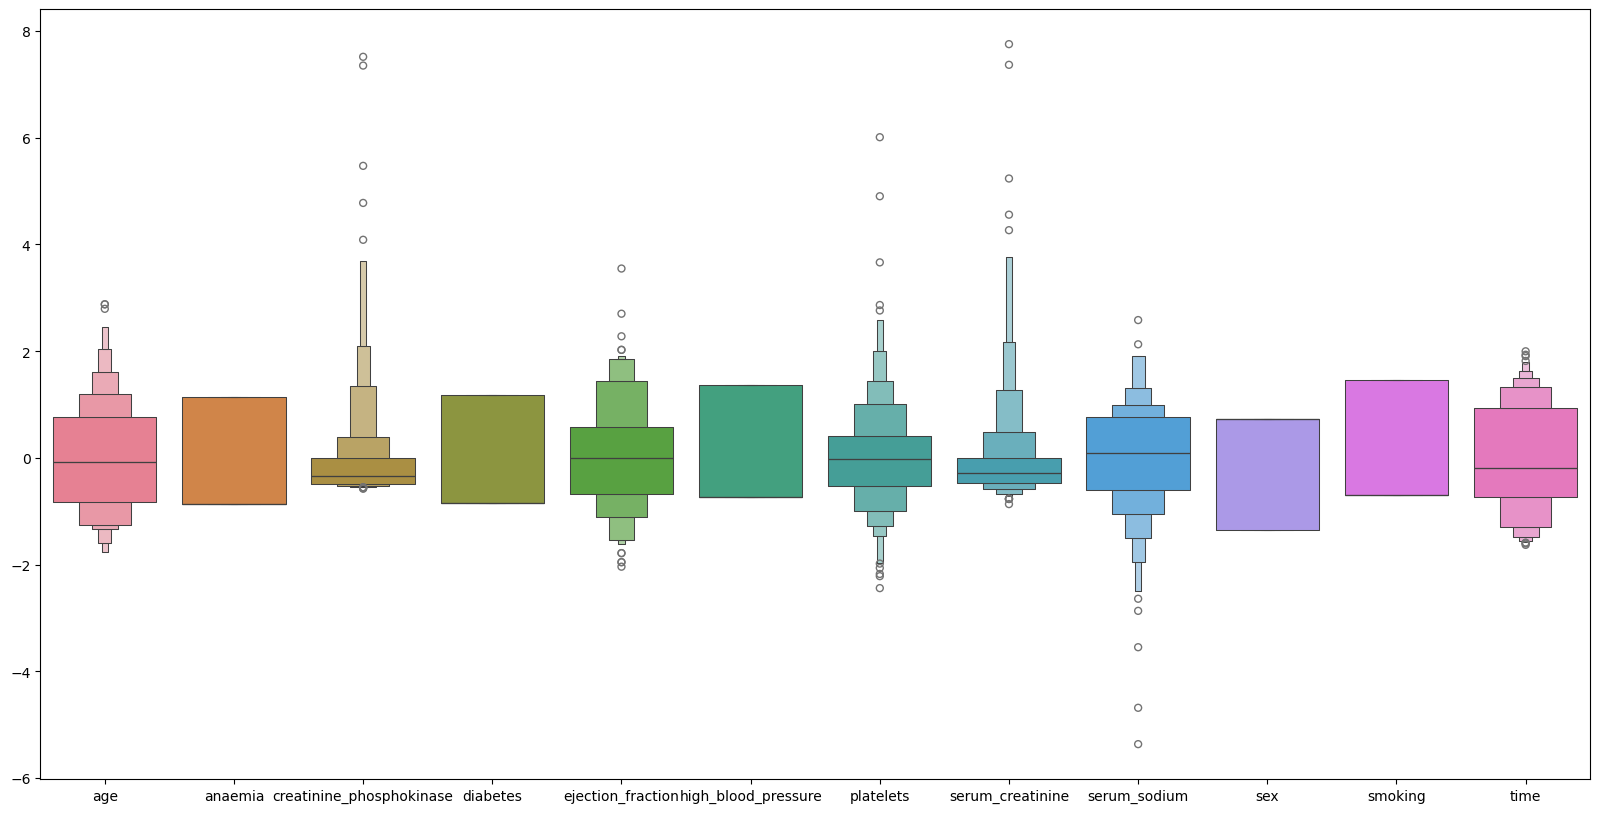

In [16]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)


In [17]:
x_train, x_tests, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3) 

In [18]:
model1 =svm.SVC()

In [19]:
model1.fit(x_train,y_train)

SVC()

In [20]:
y_pred = model1.predict(x_tests)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [21]:
y_test

123    0
232    0
13     1
84     1
130    0
      ..
24     1
82     1
157    0
265    0
273    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [22]:
y_train

237    0
159    0
116    0
3      1
41     1
      ..
256    0
33     0
168    0
70     0
106    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        59
           1       0.71      0.39      0.50        31

    accuracy                           0.73        90
   macro avg       0.72      0.65      0.66        90
weighted avg       0.73      0.73      0.71        90



In [27]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, patience = 20, restore_best_weights = True)
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim=12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [31]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(x_train, y_train, batch_size =25, epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6532 - loss: 0.6928 - val_accuracy: 0.6604 - val_loss: 0.6920
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7056 - loss: 0.6914 - val_accuracy: 0.6604 - val_loss: 0.6910
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7071 - loss: 0.6901 - val_accuracy: 0.6604 - val_loss: 0.6899
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7189 - loss: 0.6884 - val_accuracy: 0.6604 - val_loss: 0.6888
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6947 - loss: 0.6877 - val_accuracy: 0.6604 - val_loss: 0.6876
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7088 - loss: 0.6854 - val_accuracy: 0.6604 - val_loss: 0.6862
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6878 - loss: 0.6851 - val_accuracy: 0.6604 - val_loss: 0.6847
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7460 - loss: 0.6791 - val_accuracy: 0.6604 - val_loss:

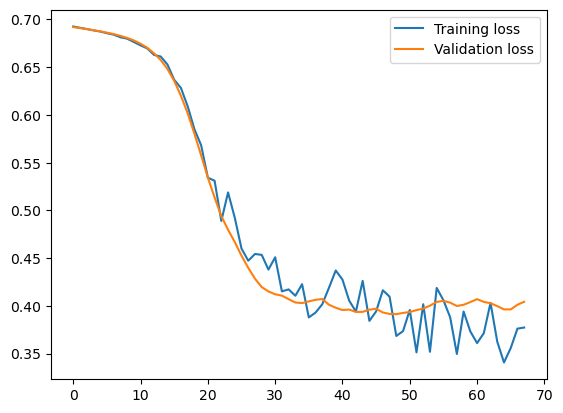

In [36]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], label = "Training loss")
plt.plot(history_df.loc[:, ['val_loss']], label = "Validation loss")
plt.legend()
plt.show()

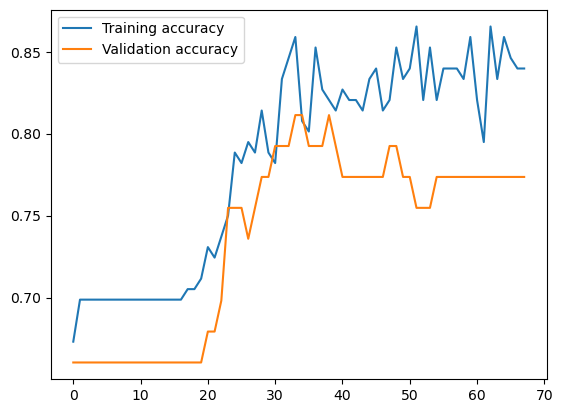

In [37]:
plt.plot(history_df.loc[:, ['accuracy']], label = "Training accuracy")
plt.plot(history_df.loc[:, ['val_accuracy']], label = "Validation accuracy")
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(x_tests)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [41]:
y_pred = (y_pred > 0.5)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        59
           1       0.80      0.52      0.63        31

    accuracy                           0.79        90
   macro avg       0.79      0.72      0.74        90
weighted avg       0.79      0.79      0.78        90

